
# Quickstart


## Creating an isotherm

First, to use pyGAPS in a python or jupyter project, import it.


In [1]:
import pygaps

Selected 0 samples
Selected 23 adsorbates


The backbone of the framework is the PointIsotherm class. This class stores the isotherm
data, isotherm properties such as material and adsorbate with which it was measured, as well
as providing easy interaction with the framework calculations. There are several ways to create
a PointIsotherm object:

- a pandas.DataFrame
- a json string or file
- parsing excel files
- parsing csv files
- from an sqlite database

If using a pandas DataFrame, first the two components of the isotherm should be created:
a dictionary with the parameters and a DataFrame with the data.

The isotherm parameters dictionary has to have at least four specific components: the sample
name, the sample batch, the adsorbent used and the temperature (in K) at which the data was
recorded.

In [2]:
isotherm_param = {
    'sample_name' : 'Carbon',
    'sample_batch' : 'X1',
    'adsorbate' : 'N2',
    't_exp' : 77,
}

The pandas DataFrame which contains the data should have at least two columns: the pressures
at which each point was recorded, and the loadings for each point. Other data columns, such
as calorimetry data, magnetic field strengths, or other simultaneous measurements are also
supported.

In [3]:
import pandas

isotherm_data = pandas.DataFrame({
    'pressure': [0.1, 0.2, 0.3, 0.4, 0.5, 0.45, 0.35, 0.25, 0.15, 0.05],
    'loading': [0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.15, 0.05]
})

With these two components, the isotherm can be created:

In [4]:
isotherm = pygaps.PointIsotherm(
    isotherm_data,
    loading_key='loading',
    pressure_key='pressure',
    **isotherm_param,
)

The `loading_key` and `pressure_key` parameters specify which column in the DataFrame
contain which data of the isotherm. By default, the loading is read in *mmmol/g* and the
pressure is read in *bar*, although these settings can be changed.

For easier Isotherm retrieval, pyGAPS also comes with a variety of parsers. Here we can use the JSON parser to get an isotherm previously saved on disk:

In [5]:
with open(r'data/carbon_x1_n2.json') as f:
    isotherm = pygaps.PointIsotherm.from_json(f.read())

To see a summary of the isotherm as well as a graph, use the included function:

Experimental isotherm
Material: Takeda 5A
Batch: Test
Adsorbate used: N2
Isotherm temperature: 77.355K
Isotherm type: Isotherme
Machine: Triflex
User: PI
Activation temperature: 200.0°C
Units: 
Unit for loading: mmol/g
Unit for pressure: bar
Other properties: 



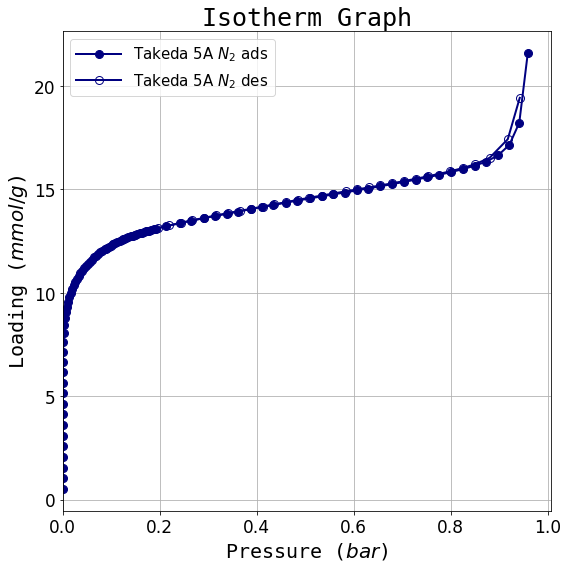

In [6]:
isotherm.print_info()

Now that the PointIsotherm is created, we are ready to do some analysis.

---

## Isotherm analysis with pyGAPS

The framework has several isotherm analysis tools which are commonly used to characterise
porous materials such as:

- BET surface area
- the t-plot method
- the alpha s method
- mesoporous PSD (pore size distribution) calculations
- microporous PSD calculations
- DFT kernel fitting PSD methods
- isosteric heat of adsorption calculation

From a PointIsotherm object, it's easy to start a characterisation. For example, to get
a dictionary with all the parameters of the tplot analysis, use:

In [7]:
result_dict = pygaps.t_plot(isotherm)

import pprint
pprint.pprint(result_dict)

{'results': [{'adsorbed_volume': 0.44934712258371012,
              'area': 99.54915759758687,
              'corr_coef': 0.99966582953042327,
              'intercept': 0.012929909242021878,
              'section': [84, 85, 86, 87, 88, 89, 90],
              'slope': 0.0028645150000192604}],
 't_curve': array([ 0.14381104,  0.14800322,  0.1525095 ,  0.15712503,  0.1617626 ,
        0.16612841,  0.17033488,  0.17458578,  0.17879119,  0.18306956,
        0.18764848,  0.19283516,  0.19881473,  0.2058225 ,  0.21395749,
        0.2228623 ,  0.23213447,  0.2411563 ,  0.24949659,  0.25634201,
        0.2635719 ,  0.27002947,  0.27633547,  0.28229453,  0.28784398,
        0.29315681,  0.29819119,  0.30301872,  0.30762151,  0.31210773,
        0.31641915,  0.32068381,  0.32481658,  0.32886821,  0.33277497,
        0.33761078,  0.34138501,  0.34505614,  0.34870159,  0.35228919,
        0.35587619,  0.35917214,  0.36264598,  0.36618179,  0.36956969,
        0.37295932,  0.37630582,  0.37957513,

If in an interactive environment, such as iPython or Jupyter, it is useful to see the
details of the calculation directly. To do this, increase the verbosity of the method and use matplotlib to display the 
automatically generated graph:

The slope of the BET line: s = 87.602
The intercept of the BET line: i = 0.238
C = 368
Amount for a monolayer: n = 0.01138 mol/unit
Minimum pressure point chosen is 0.01 and maximum is 0.093
BET surface area: a = 1111 m²/unit


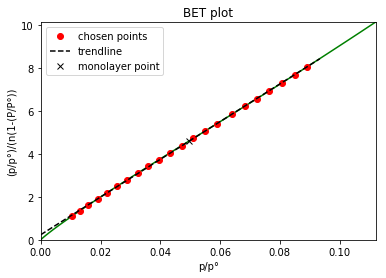

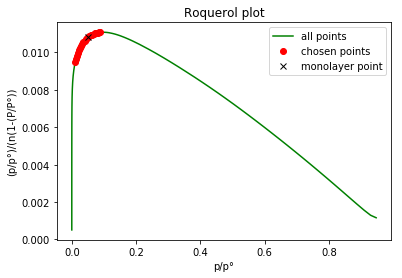

In [8]:
import matplotlib.pyplot as plt

result_dict = pygaps.area_BET(isotherm, verbose=True)

plt.show()

Depending on the method, different parameters can be passed to change the way the
calculations are performed. For example, if a mesoporous size distribution is
desired using the Dollimore-Heal method on the adsorption branch of the isotherm,
assuming the pores are cylindrical, one side open and that adsorbate thickness can
be described by a Halsey-type thickness curve, the code will look like:

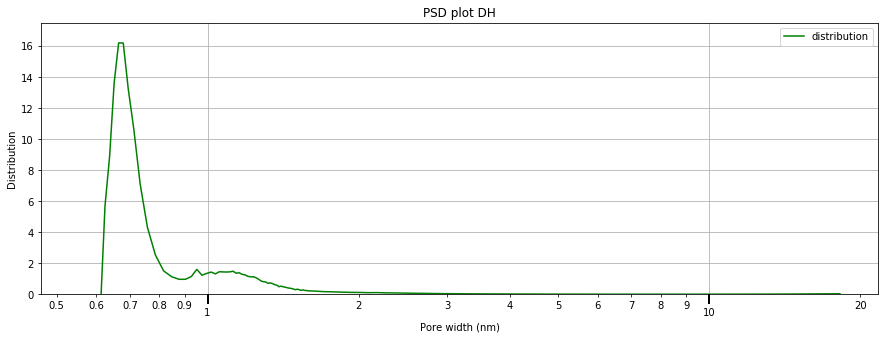

In [9]:
result_dict = pygaps.mesopore_size_distribution(
    isotherm,
    psd_model='DH',
    branch='adsorption',
    pore_geometry='cylinder',
    thickness_model='Halsey',
    verbose=True,
)
plt.show()

For more information on how to use each method, check the detailed manual.

---

## Isotherm modelling with pyGAPS

The framework comes with functionality to model point isotherm data with common
isotherm models such as:

- Henry
- Langmuir
- Double/Triple site Langmuir
- Temkin
- FH-VST

The modelling is done through the ModelIsotherm class. The class is similar to the
PointIsotherm class, and shares the same ability to store parameters. However, instead of
data, it stores model coefficients for the model it's describing.

To create a ModelIsotherm, the same parameters dictionary / pandas DataFrame procedure can
be used. But, assuming we've already created a PointIsotherm object, we can use it to instantiate
the ModelIsotherm instead. To do this we use the class method:

In [10]:
model_iso = pygaps.ModelIsotherm.from_pointisotherm(isotherm, model='Henry')

A minimisation procedure will then attempt to fit the model's parameters to the isotherm points.
If successful, the ModelIsotherm is returned.

In case the model which best fits the data is desired, the class method can also be passed a
bool which allows the ModelIsotherm to select the best fitting model. This means that all
models available will be calculated and the best one will be returned and will of course
take more processing power.

In [11]:
model_iso = pygaps.ModelIsotherm.from_pointisotherm(isotherm, guess_model=True)

More advanced settings can also be specified, such as the optimisation model to be used in the
optimisation routine or the initial parameter guess.

To print the model parameters use the internal print function. The calculation of loading
made with the model can be accessed by using the loading function.

Simulated isotherm
Material: Takeda 5A
Batch: Test
Adsorbate used: N2
Isotherm temperature: 77.355K
Isotherm type: Isotherme
Machine: Triflex
User: PI
Activation temperature: 200.0°C
Units: 
Unit for loading: mmol/g
Unit for pressure: bar
Other properties: 

Quadratic identified model parameters:
	M = 8.716470
	Ka = 27886.608235
	Kb = 170432.449386
RMSE =  0.848273550676


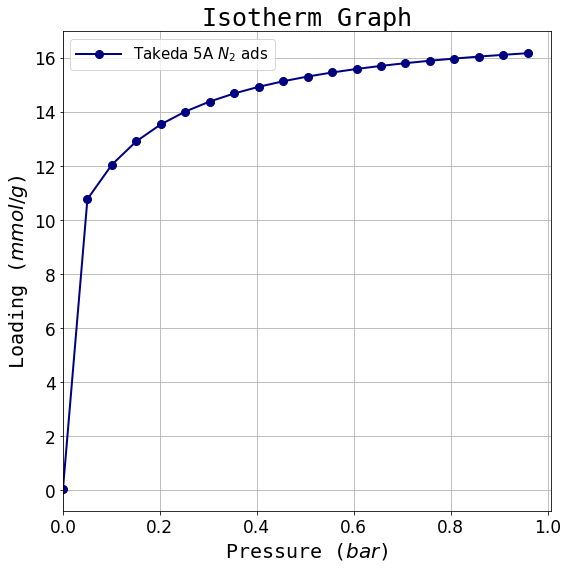

In [12]:
 # Prints isotherm parameters and model info
model_iso.print_info()

In [13]:
# Returns the loading at 1 bar calculated with the model
model_iso.loading_at(1.0)

16.20719218097793

In [14]:
# Returns the loading in the range 0-1 bar calculated with the model
pressure = [0.1,0.5,1]
model_iso.loading_at(pressure)

array([ 12.02021336,  15.28353815,  16.20719218])

## Graphing

pyGAPS makes graphing both PointIsotherm and ModelIsotherm objects easy to facilitate
visual observations, inclusion in publications and consistency. Plotting an isotherm is
as simple as:

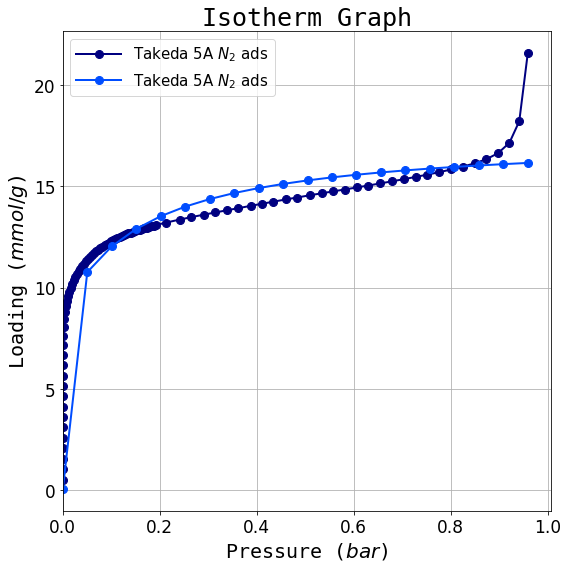

In [15]:
import matplotlib.pyplot as plt

pygaps.plot_iso([isotherm, model_iso], branch=['ads'])

plt.show()

Many settings can be specified to change the look and feel of the graphs. More settings
can be found in the manual.